In [4]:
import requests
import random
import json
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv",header=0, encoding='unicode_escape')

In [6]:
df = df[df['Name'].notna()]

In [8]:
DS_df = df[df["Name"].str.contains("Dark Souls")]#de esta solo queremos la dataframe en si, para ver las ventas.

In [10]:
DS_df
#Los 2 juegos de DS no nos interesan, son de bleach.

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
845,Dark Souls,PS3,2011.0,Role-Playing,Namco Bandai Games,0.75,0.51,0.54,0.22,2.02,89.0,54.0,8.7,1397.0,From Software,M
1107,Dark Souls III,PS4,2016.0,Role-Playing,Namco Bandai Games,0.65,0.45,0.34,0.22,1.65,89.0,69.0,8.8,1940.0,From Software,M
1550,Dark Souls II,PS3,2014.0,Role-Playing,Namco Bandai Games,0.40,0.33,0.40,0.15,1.27,91.0,69.0,8.1,1107.0,From Software,T
2091,Dark Souls,X360,2011.0,Role-Playing,Namco Bandai Games,0.64,0.27,0.00,0.09,0.99,89.0,66.0,8.4,1106.0,From Software,M
2756,Dark Souls II,X360,2014.0,Role-Playing,Namco Bandai Games,0.48,0.18,0.01,0.07,0.74,91.0,30.0,7.9,915.0,From Software,T
3323,Dark Souls II,PS4,2015.0,Role-Playing,Namco Bandai Games,0.21,0.23,0.08,0.09,0.60,NaN,NaN,NaN,NaN,NaN,NaN
4887,Dark Souls III,XOne,2016.0,Role-Playing,Namco Bandai Games,0.26,0.09,0.00,0.04,0.39,87.0,14.0,8.6,514.0,From Software,NaN
7086,Dark Souls II,XOne,2015.0,Role-Playing,Namco Bandai Games,0.14,0.07,0.00,0.02,0.23,NaN,NaN,NaN,NaN,NaN,NaN
8202,Dark Souls II,PC,2014.0,Role-Playing,Namco Bandai Games,0.08,0.08,0.00,0.01,0.17,91.0,36.0,7.1,2318.0,From Software,T
8806,Bleach: Dark Souls,DS,2007.0,Fighting,Sega,0.12,0.02,0.00,0.01,0.15,82.0,28.0,7.9,14.0,Treasure,T


In [15]:
DSX360_df = DS_df[DS_df["Platform"]=="X360"]
DSPS2_df = DS_df[DS_df["Platform"]=="PS2"]
DSPS3_df = DS_df[DS_df["Platform"]=="PS3"]
DSPC_df = DS_df[DS_df["Platform"]=="PC"]
DSPS4_df = DS_df[DS_df["Platform"]=="PS4"]
DSXOne_df = DS_df[DS_df["Platform"]=="XOne"]

In [18]:
lista_ventas = {}
lista_ventas["X360"] = DSX360_df["Global_Sales"].sum()
lista_ventas["XOne"] = DSXOne_df["Global_Sales"].sum()
lista_ventas["PS2"] = DSPS2_df["Global_Sales"].sum()
lista_ventas["PS3"] = round(DSPS3_df["Global_Sales"].sum(),2)
lista_ventas["PS4"] = round(DSPS4_df["Global_Sales"].sum(),2)
lista_ventas["PC"] = round(DSPC_df["Global_Sales"].sum(),2)
lista_ventas

{'X360': 1.73, 'XOne': 0.62, 'PS2': 0.0, 'PS3': 3.29, 'PS4': 2.25, 'PC': 0.31}

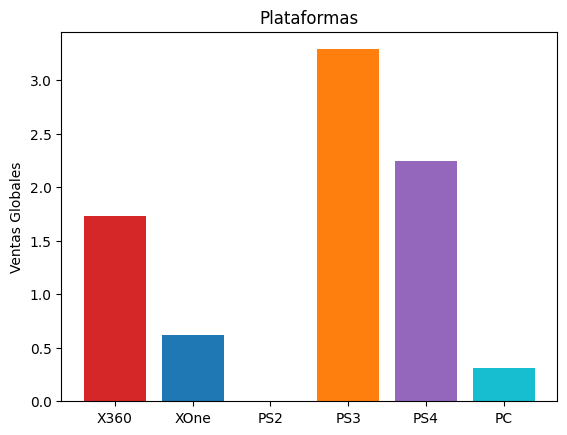

In [24]:
fig, ax = plt.subplots()


ventas = lista_ventas.values()
plataformas = lista_ventas.keys()
bar_labels = ['X360', "XOne", 'PS2',"PS3", "PS4","PC"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange','tab:purple','tab:cyan']

ax.bar(plataformas, ventas, label=bar_labels, color=bar_colors)

ax.set_ylabel('Ventas Globales')
ax.set_title('Plataformas')

plt.show()